In [1]:
%load_ext autoreload
%autoreload 2
import os
project_name = "PaddleSeg"
os.chdir(os.path.join(os.getcwd().split(project_name, 1)[0], project_name))

In [2]:
import json
paths = [
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\ВЖР\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\Жыланды\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Нурказган\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Саяк\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Шатыркуль\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р.Абыз\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р.Жомарт\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\р.Западный\Заколы',
  'Z:\datasets\cracks\КЦТ_Фото_Шахты\ЮЖР\закол',
]

In [3]:
import pandas as pd
from run.annotator.helpers import artifacts
images = []

for path in paths:
  for fname in os.listdir(path):
    if fname.endswith('.json'):
      f_path = os.path.join(path, fname)
      with open(f_path, 'r') as f:
        str = f.read()        
        body = json.loads(str)
        flags = body['flags']
        # print(flags)
        images.append({'path': f_path} | {artifacts[k]: v for k, v in flags.items()})

df = pd.DataFrame(images)
subdf = df[df['Закольные трещины'] == True]

In [4]:
def format_percent(val) -> str:
  return "{:0.2f}".format(val*100)

In [5]:
total_df_size = len(df)
with_cracks_df_size = len(subdf)
print(f'Всего изображений проанализировано = {total_df_size}\nКоличество изображений потенциально имеющие трещины = {with_cracks_df_size} ({format_percent(with_cracks_df_size / total_df_size)} %)')

Всего изображений = 416
Количество изображений потенциально имеющие трещины = 177 (42.55 %)


[]


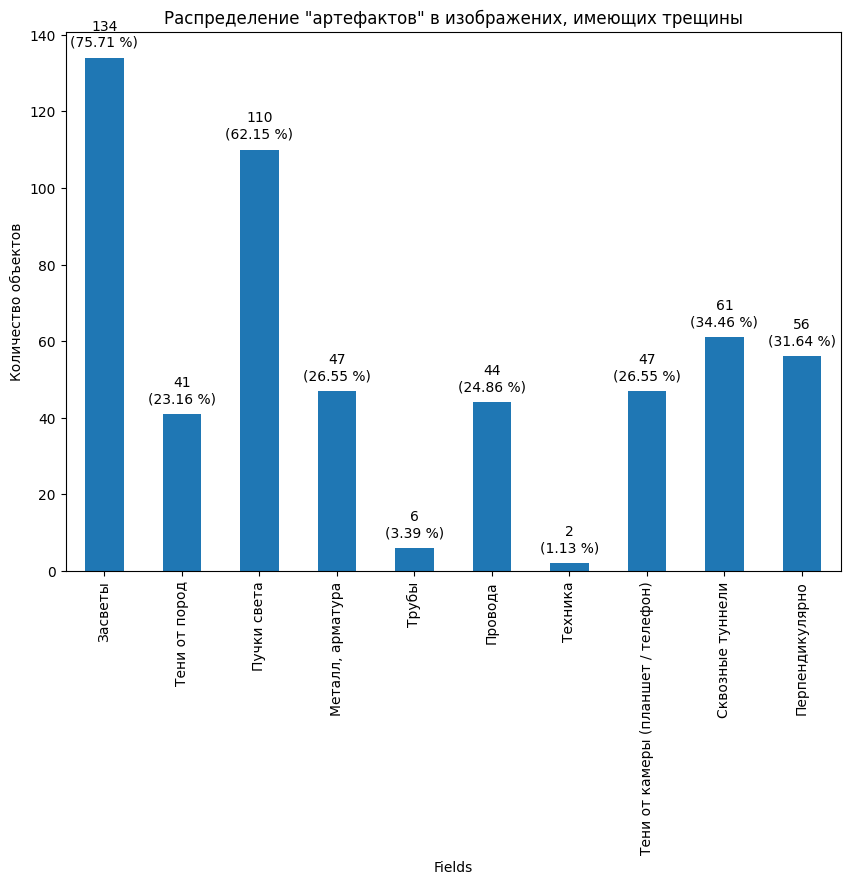

In [13]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
      val = y[i]
      plt.text(i, val+3, f'{val}\n({format_percent(val/with_cracks_df_size)} %)', ha = 'center')
# Filter the DataFrame


# Count the trueness of each field in subdf
truiness_counts = subdf.iloc[:, 2:].sum()


x, y = [list(t) for t in zip(*truiness_counts.items())]



print(list())

# Plotting
plt.figure(figsize=(10, 7))
addlabels(x, y)
truiness_counts.plot(kind='bar')
plt.title('Распределение "артефактов" в изображениях, имеющих трещины')
plt.ylabel('Количество объектов')
plt.xlabel('Fields')
plt.xticks(rotation=90)
plt.show()

In [23]:
required_cols = [
  'Закольные трещины', 
  # 'Перпендикулярно',
]
excluded_cols = [
  'Засветы',
  'Пучки света',
  'Техника',
  'Тени от камеры (планшет / телефон)',
  'Сквозные туннели',
  'Металл, арматура',
]

condition = df[required_cols].all(axis=1) & ~df[excluded_cols].any(axis=1)

best_df = df[condition]
best_df

,path,Закольные трещины,Засветы,Тени от пород,Пучки света,"Металл, арматура",Трубы,Провода,Техника,Тени от камеры (планшет / телефон),Сквозные туннели,Перпендикулярно
56,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Нурказган...,True,False,False,False,False,False,False,False,False,False,True
117,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Нурказган...,True,False,True,False,False,False,True,False,False,False,True
127,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Саяк\Зако...,True,False,False,False,False,False,False,False,False,False,True
128,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Саяк\Зако...,True,False,False,False,False,False,False,False,False,False,True
129,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Саяк\Зако...,True,False,False,False,False,False,False,False,False,False,True
139,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Шатыркуль...,True,False,True,False,False,False,True,False,False,False,False
142,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Шатыркуль...,True,False,False,False,False,False,False,False,False,False,True
143,Z:\datasets\cracks\КЦТ_Фото_Шахты\р. Шатыркуль...,True,False,False,False,False,False,False,False,False,False,True
199,Z:\datasets\cracks\КЦТ_Фото_Шахты\р.Абыз\Закол...,True,False,True,False,False,False,False,False,False,False,True
250,Z:\datasets\cracks\КЦТ_Фото_Шахты\р.Жомарт\Зак...,True,False,False,False,False,False,False,False,False,False,True


In [25]:
import base64
from PIL import Image, ImageTk
import io

target_dir = os.getcwd()

for i, row in best_df.iterrows():
  path = row['path']
  with open(path, 'r') as f:
    obj = json.loads(f.read())
    image_data = base64.b64decode(obj['imageData'])
    image = Image.open(io.BytesIO(image_data))
    base_path = path.split(os.sep)[-1].split('.json')[0]    
    image.save(os.path.join(target_dir, 'run', 'best', f'{base_path}.png'))